In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay.columns

Index(['Time', 'O3_flag', 'SO2_flag', 'NO2_flag', 'NO_flag', 'CO_flag',
       'PM10_flag', 'PM2.5_flag', 'WDir_Avg', 'Rain_Tot', 'WDir_SD', 'O3',
       'SO2', 'NO2', 'NO', 'CO', 'PM10', 'PM2.5', 'Temp_Avg', 'RH_Avg',
       'WSpeed_Avg', 'WSpeed_Max', 'Press_Avg', 'Rad_Avg'],
      dtype='object')

In [6]:
dfDay[["Time", "RH_Avg"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    3453 non-null   datetime64[ns]
 1   RH_Avg  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.1 KB


In [7]:
dfDay[["Time", "RH_Avg"]].describe()

,Time,RH_Avg
count,3453,3265.000000
mean,2020-04-23 03:36:26.272806400,61.178079
min,2015-08-01 00:00:00,0.408878
25%,2017-12-11 00:00:00,49.597813
50%,2020-04-22 00:00:00,64.785764
75%,2022-09-02 00:00:00,74.459132
max,2025-01-27 00:00:00,98.498681
std,NaN,16.665208


In [12]:
def clean(x):
    if x >= 0 and x < 100: return x
    return np.nan

In [14]:
dfDay["RH_Avg"] = dfDay["RH_Avg"].apply(clean)

In [11]:
dfDay["RH_Avg"].describe()

count    3265.000000
mean       61.178079
std        16.665208
min         0.408878
25%        49.597813
50%        64.785764
75%        74.459132
max        98.498681
Name: RH_Avg, dtype: float64

In [15]:
dfDay["RH_Avg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: RH_Avg
Non-Null Count  Dtype  
--------------  -----  
3265 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


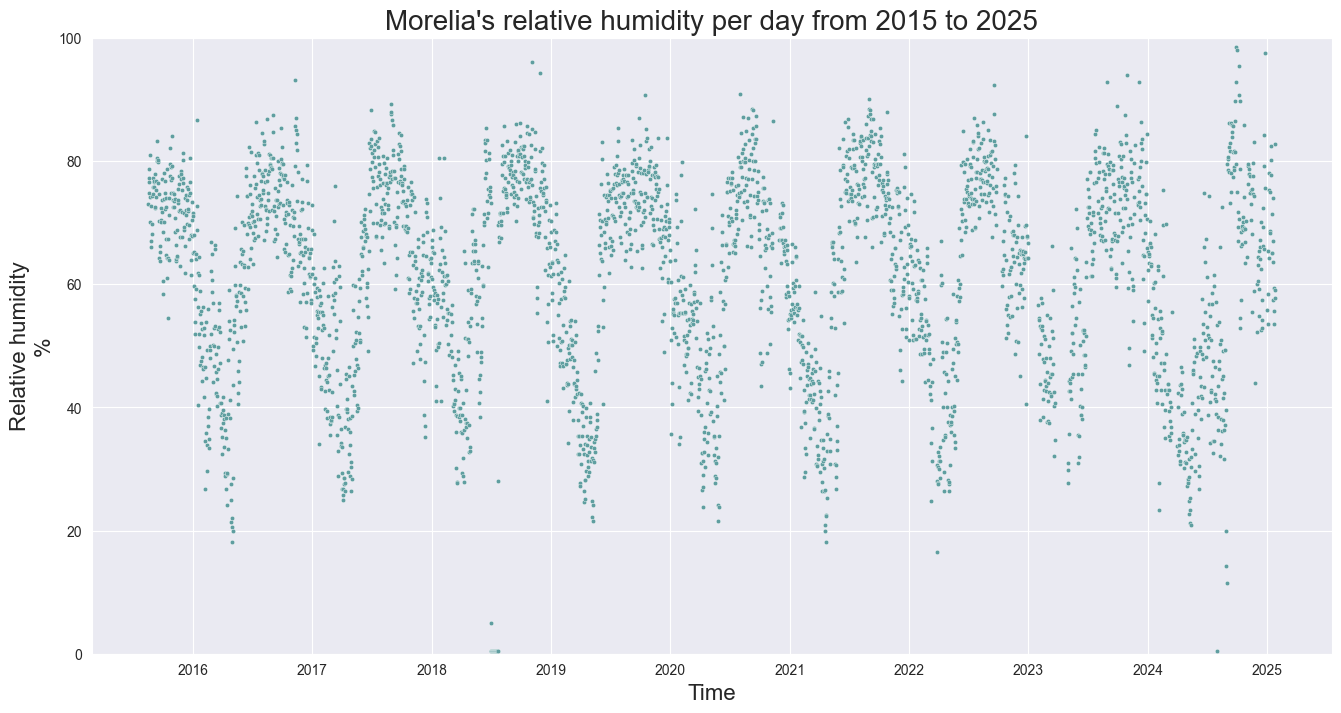

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["RH_Avg"], s=10, color="cadetblue")
plt.ylim(0, 100)
plt.ylabel("Relative humidity\n%", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's relative humidity per day from 2015 to 2025", size=20)
plt.show()